## Linear Regression Code from Scratch

In this tutorial, we will be writing the code from scratch for Linear Regression using the First Approach that we studied i.e. using the R-Squared Error and then we will move on to plotting the "Best Fit Line" using Gradient Descent.
So, let's get started.

### Step-1: Import the Dependencies.
Mean: to calculate the mean of the data points

Numpy: for numerical calculations

Matplotlib: to plot the data

Pandas: to load the data and modify it

In [49]:
# Import Dependencies
from statistics import mean
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

We discussed in the starting tutorials that a straight line is represented by the equation: 
##### y = mx + b
where,
#### m: Slope of the line
#### b: bias


### Step2: Fit a line to Input Data

Also, we studied that to find out the "Best Fit Line" we require the values of m and b. So, to find the best fit line, we used the formula:

#### Slope(m) = (mean(x)*mean(y) - mean(x*y)) / (mean(x)^2 - mean(x^2))

#### Bias(b) = mean(y) - m*mean(x)

and then put these values in the equation of a straight line to get the new values for y or what we called in the tutorial as y_hat. 

In [50]:
# Equation for a Straight Line:  y = mx + b
# Function to predict the Best Fit Slope
# Slope(m) = (mean(x)*mean(y) - mean(x*y))/(mean(x)^2 - mean(x^2))
# Bias(b) = mean(y) - m*mean(x)

def best_fit_slope(X,y):
    slope_m = ((mean(X)*mean(y)) - mean(X*y))/(mean(X)**2 - mean(X**2))
    bias_b = mean(y) - slope_m*mean(X)
    return slope_m, bias_b

In the above function, we have calculated the hard coded values for slope(m) and the bias(b). Now, let's input our data and see how this function performs to form a "Best Fit Line".


### Step-3: Load Dataset
For this code, we will be taking the "Swedish Insurance Dataset". This is a very simple dataset to start with and involves predicting the total payment for all the claims in thousands of Swedish Kronor (y) given the total number of claims (X). This means that for a new number of claims (X) we will be able to predict the total payment of claims (y).

Let's load our data and have a look at it.

In [51]:
# Load the data using Pandas

df = pd.read_csv('Insurance-dataset.csv')

In [52]:
# Let's have a look at the data, what it looks like, how many data points are there in the data.

print(df.head())

     X      Y
0  108  392.5
1   19   46.2
2   13   15.7
3  124  422.2
4   40  119.4


Data is in the form of two columns, X and Y. X is the total number of claims and Y represents the claims in thousands of Swedish Kronor.

Now, let's describe our data.

In [53]:
df.describe()

,X,Y
count,63.000000,63.000000
mean,22.904762,98.187302
std,23.351946,87.327553
min,0.000000,0.000000
25%,7.500000,38.850000
50%,14.000000,73.400000
75%,29.000000,140.000000
max,124.000000,422.200000


So, both the columns have equal number of data points. Hence, the dataset is stable. No need to modify the data. We also get the mean, max values in both columns etc.

Now, let's put the data in the form to be input to the function we just defined above.

In [54]:
# Load the data in the form to be input to the function for Best Fit Line

X = np.array(df['X'], dtype=np.float64)
y = np.array(df['Y'], dtype=np.float64)

### Step-4: Scatter Plot of Input Data
Before going any further, let's first plot our data and see if it's linear or not. Remember, we require linear data to plot a best fit line and neglect the Outliers.
So, let's plot the data.

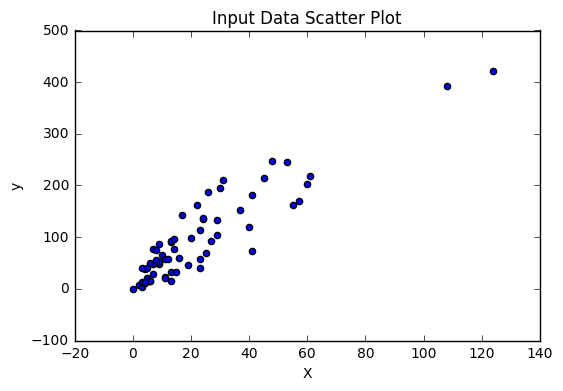

In [55]:
# Scatter Plot of the Input Data

fig,ax = plt.subplots()
ax.scatter(X,y)
ax.set_xlabel('X')
ax.set_ylabel('y')
ax.set_title('Input Data Scatter Plot')

From the above plot, we can see that the data is pretty linear except for 1 or 2 points. But that's ok. We can work with that.

Now, lets use the function we defined above and find the values for m and b to get the line that best fits the data.

In [56]:
m,b = best_fit_slope(X,y)

print('Slope: ',m)
print('Bias: ',b)

Slope:  3.41382356007
Bias:  19.9944857591


### Step-5: Calculate Values of y_hat
Using these values of m and b, we can now find out the values of y which we call as y_hat and when we plot them with X, we get our line.

In [57]:
# Calculate y_hat

y_hat = m*X + b

print('y_hat: ', y_hat)

y_hat:  [ 388.68743025   84.8571334    64.37419204  443.30860721  156.54742816
  214.58242868   98.51242764   67.7880156   173.61654596   54.13272136
   37.06360356  183.85801664   57.54654492   98.51242764   43.89125068
   26.82213288  101.9262512    40.47742712   30.23595644   98.51242764
   40.47742712   50.7188978    50.7188978    30.23595644  118.995369
   43.89125068   33.64978      88.27095696   43.89125068   33.64978
   19.99448576  105.34007476   40.47742712   37.06360356   95.09860408
   57.54654492  228.23772292   60.96036848   33.64978      74.61566272
   64.37419204  224.82389936  159.96125172  146.30595748  207.75478156
  159.96125172   57.54654492  112.16772188   47.30507424   30.23595644
   78.02948628   64.37419204   64.37419204   71.20183916   47.30507424
  118.995369    122.40919256  101.9262512    50.7188978   125.82301612
   67.7880156   200.92713444  108.75389832]


### Step-6: Plot Line of Best Fit
Now, we have got the values for y_hat, m and b. Now, we can go ahead and plot the line that fits the data.

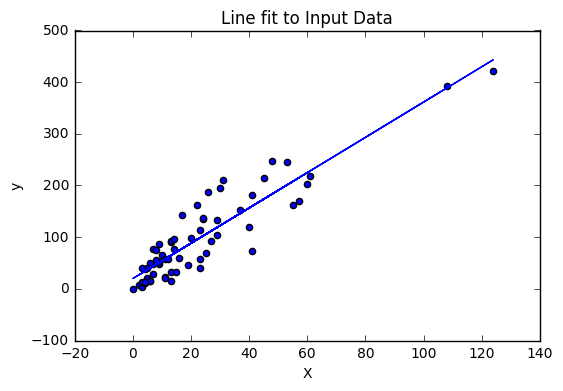

In [58]:
# Scatter Plot of the Input Data with the line fit on Input Data

fig,ax = plt.subplots()
ax.scatter(X,y)
ax.set_xlabel('X')
ax.set_ylabel('y')
ax.plot(X,y_hat)
ax.set_title('Line fit to Input Data')

### Step-7: Find the Squared Error and R-Squared Error

So, in the above plot we get the plot of the line fit to input data points. But is this line really a good fit line ??

Now, we will write a function to check the accuracy of this line and see how really best fit is this line.

So, how to proceed from here. Remember, we talked about the Square Error and the R-Squared Error equations which help to provide the accuracy for the so called best fit line. Let's implement these functions.

So, what is the equation for Squared Error? 

### Squared Error = sum((y_hat - y)^2) 

Let's implement this.

In [59]:
# Squared Error
# Squared Error = sum((y_hat-y)^2)
def squared_Error(y, y_hat):
    return sum((y_hat - y)**2)


Now, we have our squared error. Next we want to calculate the R-Squared Error using Squared Error function. So, what was the formula for this.

### R-Squared Error  =  1 - ((Squared_Error(y_hat)) / (Squared_Error(mean(y))))

So, let's implement it.

In [60]:
# R-Squared Error

def r_squared(y,y_hat):
    # Mean of all data points forms the mean line
    mean_line = mean(y)
    
    # Squared Error between Regression Line (y_hat) and the data points
    y_hat_Squared_Error = squared_Error(y,y_hat)
    
    # Squared Error between Mean Line and data points
    y_Squared_Error = squared_Error(y,mean_line)
    
    return 1 - (y_hat_Squared_Error/y_Squared_Error)

So, now since we have implemented both the functions, it's time to evaluate our results. Let's see how accuate our current line is.

In [61]:
print('R-Squared Error: ', r_squared(y,y_hat))

R-Squared Error:  0.833346671979


So, the R-Squared error is 0.833. But wait a minute. In the tutorial we explained that R-Squared Error is actually the accuracy of the line. So what is our error ??

In [62]:
# Error%

error = 1 - r_squared(y,y_hat)
print('Error% : ', error*100)

Error% :  16.6653328021


In [63]:
# Accuracy%

print('Accuracy% : ', r_squared(y,y_hat))

Accuracy% :  0.833346671979


So, our line is 83.33% accurate, which is pretty great but we would still like to improve the accuracy.